## Including all Libraries

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

### Splitting the dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


### Check the data format - Channels first/Channels Last (NCHW and NHCW)
Also normalizing the data

In [3]:
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  inpx = (1, img_rows, img_cols)

else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Describe the output classes

In [4]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

### Model

In [5]:
inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx) #32 filters each of size 3 x 3
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1) # 64 filters each of size 3 x 3
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3) # regularization, drops out the neurons with lower probability
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6) # softmax assigns probabilistic values to input values

In [9]:
model = Model([inpx], layer7)
model.compile(optimizer=keras.optimizers.Adadelta(), # a kind of gradient descent optimizer
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=12, batch_size=32)

Epoch 1/12
1875/1875 [==============================] - 159s 84ms/step - loss: 2.3852 - accuracy: 0.0993
Epoch 2/12
1875/1875 [==============================] - 156s 83ms/step - loss: 2.2851 - accuracy: 0.1316
Epoch 3/12
1875/1875 [==============================] - 157s 83ms/step - loss: 2.1951 - accuracy: 0.4004
Epoch 4/12
1875/1875 [==============================] - 157s 83ms/step - loss: 2.1017 - accuracy: 0.5454
Epoch 5/12
1875/1875 [==============================] - 158s 84ms/step - loss: 1.9834 - accuracy: 0.5727
Epoch 6/12
1875/1875 [==============================] - 160s 85ms/step - loss: 1.8176 - accuracy: 0.6330
Epoch 7/12
1875/1875 [==============================] - 156s 83ms/step - loss: 1.6029 - accuracy: 0.6842
Epoch 8/12
1875/1875 [==============================] - 156s 83ms/step - loss: 1.3723 - accuracy: 0.7185
Epoch 9/12
1875/1875 [==============================] - 156s 83ms/step - loss: 1.1742 - accuracy: 0.7405
Epoch 10/12
1875/1875 [==============================] 

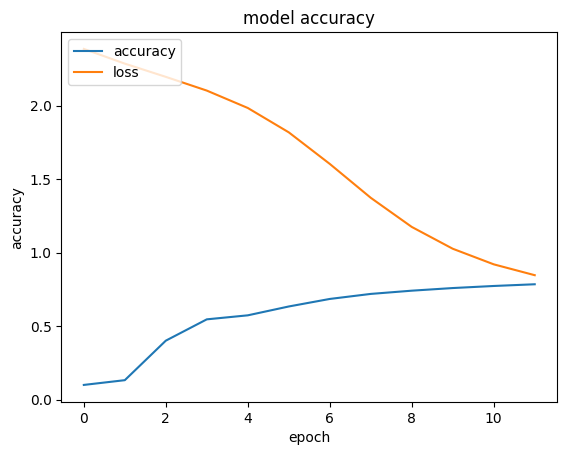

In [22]:
import matplotlib.pyplot as plt
# print(model.history.history.keys())

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()